# UAS MACHINE LEARNING 2

Arieldhipta Tarliman - 2702234636

# Identify what actions can be undertaken to improve retention

# Dataset

Dataset 2B (telecommunications customers)
- Customer’s ID: the customer’s ID
- Gender: gender of the individual
- Birth Date: the birth date of the individual
- Married: whether the customer is married or not (yes/no)
- Dependents: whether the customer has dependents or not (yes/no)
- Number of Dependents: the number of the customer’s dependents
- Country: the customer’s current country
- City: the city where the customer is currently residing in
- Number of Referrals: the number of referrals made by the customer
- Tenure in Months: the total duration of the customer being the company’s customer (months)
- Avg Monthly Long Distance Charges: the average monthly charges for long distance communications(USD)
- Internet Service: whether the customer uses the company’s internet service
- Internet Type: the customer’s current internet service type
- Avg Monthly GB Download: the average data usage for download by the customer (GB)
- Premium Tech Support: whether the customer subscribes to premium tech support
- Streaming Movies: whether the customer subscribes to movie streaming services
- Streaming Music: whether the customer subscribes to music streaming services
- Contract: the type of contract by duration
- Paperless Billing: whether the customer selects paperless billing
- Payment Method: the customer’s usual payment method
- Monthly Charge: average monthly charge for the customer
- Total Refunds: total refunds given to the customer
- Satisfaction Score: the satisfaction score given by the customer

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import logging
logging.basicConfig(filename='warnings2.log', level=logging.WARNING)
logging.captureWarnings(True) 
import random
SEED = 42
random.seed(SEED)
np.random.seed(SEED)


# Read Dataset

In [2]:
df = pd.read_csv('2B.tsv', sep='\t')

## Simple EDA

In [3]:
df.head()

Customer ID  Gender  Birth Date Married Dependents  Number of Dependents  \
0  8779-QRDMV    Male  1946/07/17      No         No                     0   
1  7495-OOKFY  Female  1950/11/12     Yes        Yes                     1   
2  1658-BYGOY    Male  1953/03/21      No        Yes                     3   
3  4598-XLKNJ  Female  1946/03/08     Yes        Yes                     1   
4  4846-WHAFZ  Female  1944/04/02     Yes        Yes                     1   

         Country         City  Number of Referrals  Tenure in Months  ...  \
0  United States  Los Angeles                    0                 1  ...   
1  United States  Los Angeles                    1                 8  ...   
2  United States  Los Angeles                    0                18  ...   
3  United States    Inglewood                    1                25  ...   
4  United States     Whittier                    1                37  ...   

   Avg Monthly GB Download Premium Tech Support Streaming Movies  \
0                        8                   No              Yes   
1                       17                   No               No   
2                       52                   No              Yes   
3                       12                   No              Yes   
4                       14                   No               No   

   Streaming Music        Contract Paperless Billing   Payment Method  \
0               No  Month-to-Month               Yes  Bank Withdrawal   
1               No  Month-to-Month               Yes      Credit Card   
2              Yes  Month-to-Month               Yes  Bank Withdrawal   
3               No  Month-to-Month               Yes  Bank Withdrawal   
4               No  Month-to-Month               Yes  Bank Withdrawal   

  Monthly Charge Total Refunds Satisfaction Score  
0          39.65          0.00                  3  
1          80.65          0.00                  3  
2          95.45         45.61                  2  
3          98.50         13.43                  2  
4          76.50          0.00                  2  

[5 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Birth Date                         7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Country                            7043 non-null   object 
 7   City                               7043 non-null   object 
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Avg Monthly Long Distance Charges  7043 non-null   float64
 11  Internet Service                   7043 non-null   objec

In [5]:
df.describe()

Number of Dependents  Number of Referrals  Tenure in Months  \
count           7043.000000          7043.000000       7043.000000   
mean               0.468692             1.951867         32.386767   
std                0.962802             3.001199         24.542061   
min                0.000000             0.000000          1.000000   
25%                0.000000             0.000000          9.000000   
50%                0.000000             0.000000         29.000000   
75%                0.000000             3.000000         55.000000   
max                9.000000            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                27.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Refunds  Satisfaction Score  
count     7043.000000    7043.000000         7043.000000  
mean        64.761692       1.962182            3.244924  
std         30.090047       7.902614            1.201657  
min         18.250000       0.000000            1.000000  
25%         35.500000       0.000000            3.000000  
50%         70.350000       0.000000            3.000000  
75%         89.850000       0.000000            4.000000  
max        118.750000      49.790000            5.000000

# Handling Duplicated Value

## Check Duplicated Value

In [ ]:
df.duplicated().sum()

0

# Handling Missing Value

## Check Missing Value

In [ ]:
print("Missing values:")
df.isna().sum()

Missing values:


Customer ID                             0
Gender                                  0
Birth Date                              0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges       0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Premium Tech Support                    0
Streaming Movies                        0
Streaming Music                         0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Refunds                           0
Satisfaction Score                      0
dtype: int64

All of the missing value are on Internet Type, lets see in the dataset for further adjustment.

In [ ]:
print(f'Total percentage of missing value : {(df.isna().sum().sum()) / len(df) * 100}')

Total percentage of missing value : 21.666903308249324


21% of the data will be lost, if i decided to drop the missing value. 21% of the data should have significantly affect our model result.

## Further Elaboration

In [9]:
print(df['Internet Service'].value_counts())
print(df['Internet Type'].value_counts())

Internet Service
Yes    5517
No     1526
Name: count, dtype: int64
Internet Type
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64


In [ ]:
missing_internet_type = df[df['Internet Type'].isna()]
internet_service_no = missing_internet_type[missing_internet_type['Internet Service'] == 'No']
internet_service_yes = missing_internet_type[missing_internet_type['Internet Service'] == 'Yes']


print(f"Customers with missing Internet Type and no Internet Service: {len(internet_service_no)}")
print(f"Percentage of missing Internet Type due to no Internet Service: {len(internet_service_no) / len(missing_internet_type) * 100:.2f}%")

print(f"\nCustomers with missing Internet Type and have Internet Service: {len(internet_service_yes)}")
print(f"Percentage of missing Internet Type due to no Internet Service: {len(internet_service_yes) / len(missing_internet_type) * 100:.2f}%")

Customers with missing Internet Type and no Internet Service: 1526
Percentage of missing Internet Type due to no Internet Service: 100.00%

Customers with missing Internet Type and have Internet Service: 0
Percentage of missing Internet Type due to no Internet Service: 0.00%


This conclude that all the individuals that doesn't have internet service dont have any internet type. The best solution is to add a new internet type so it doens't lost 21% of the data.

In [ ]:
df['Internet Type'] = df.apply(
    lambda row: 'None' if row['Internet Service'] == 'No' else row['Internet Type'], axis=1
)

In [ ]:
print("Missing values after imputation:")
df.isna().sum()


Missing values after imputation:


Customer ID                          0
Gender                               0
Birth Date                           0
Married                              0
Dependents                           0
Number of Dependents                 0
Country                              0
City                                 0
Number of Referrals                  0
Tenure in Months                     0
Avg Monthly Long Distance Charges    0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Premium Tech Support                 0
Streaming Movies                     0
Streaming Music                      0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Refunds                        0
Satisfaction Score                   0
dtype: int64

There are no duplicated value after inputing the missing data.

# Handling Unique Value

In [ ]:
def show_unique_values(df, max_display=10):
    for column in df.columns:
        unique_values = sorted(df[column].unique())
        
        unique_count = len(unique_values)
        print(f"Column '{column}' has {unique_count} unique values.")
        
        if unique_count > max_display:
            display_values = unique_values[:5] + ["..."] + unique_values[-5:]
            print(f"Sample unique values: {display_values}")
        else:
            print(f"Unique values: {unique_values}")
        print("-" * 50)

show_unique_values(df)

Column 'Customer ID' has 7043 unique values.
Sample unique values: ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0011-IGKFF', '0013-EXCHZ', '...', '9987-LUTYD', '9992-RRAMN', '9992-UJOEL', '9993-LHIEB', '9995-HOTOH']
--------------------------------------------------


Column 'Gender' has 2 unique values.
Unique values: ['Female', 'Male']
--------------------------------------------------
Column 'Birth Date' has 6002 unique values.
Sample unique values: ['1944/01/05', '1944/01/07', '1944/01/17', '1944/01/20', '1944/01/21', '...', '2005/12/09', '2005/12/10', '2005/12/15', '2005/12/16', '2005/12/28']
--------------------------------------------------
Column 'Married' has 2 unique values.
Unique values: ['No', 'Yes']
--------------------------------------------------
Column 'Dependents' has 2 unique values.
Unique values: ['No', 'Yes']
--------------------------------------------------
Column 'Number of Dependents' has 10 unique values.
Unique values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
--------------------------------------------------
Column 'Country' has 1 unique values.
Unique values: ['United States']
--------------------------------------------------
Column 'City' has 1106 unique values.
Sample unique values: ['Acampo', 'Acton', 'Adelanto', 'Adin', 'Ag

From the result i can conclude:
- Column Customer ID needed to be dropped because all the value are unique
- Column Country also needed to be dropped because it only contain 1 unqiue value

In [14]:
df = df.drop(['Customer ID', 'Country'], axis=1)

# Handling Column

In [15]:
for i in df.columns:
    a = df[i].value_counts()
    print(f'{a}\n')

Gender
Male      3555
Female    3488
Name: count, dtype: int64

Birth Date
2004/09/30    5
1973/06/07    5
1980/02/13    4
1966/06/22    4
1963/11/22    4
             ..
1999/10/14    1
1973/02/09    1
1981/04/01    1
1979/12/09    1
1980/11/21    1
Name: count, Length: 6002, dtype: int64

Married
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

Number of Dependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
8       1
9       1
Name: count, dtype: int64

City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Jacumba               2
South Lake Tahoe      2
Johannesburg          2
Eldridge              2
Holtville             2
Name: count, Length: 1106, dtype: int64

Number of Referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221

## Handling Derived Column

In [ ]:
derived_dependents = df['Number of Dependents'] > 0
is_equivalent = (df['Dependents'] == 'Yes') == derived_dependents

print(f"Dependents is redundant: {is_equivalent.all()}")

pd.crosstab(df['Dependents'], derived_dependents)

Dependents is redundant: True


Number of Dependents  False  True 
Dependents                        
No                     5416      0
Yes                       0   1627

In [ ]:
df['Dependents'] = df['Dependents'].astype('object')
df = df.drop(['Number of Dependents'], axis=1)

Both Dependents and Number of Dependets column are alike (redundant) both also have very unbalance column. I rather to keep column Dependents for more simplicty of its variation value make it easier for our model to decide.


## Handling Very Unbalance Column 

In [18]:
df['Refunds_Status'] = df['Total Refunds'].apply(lambda x: 'No' if x == 0.00 else 'Yes')

I also change the total refunds into refund status because of the highly imbalance data

## Handling column with high cardinality

Number of unique cities: 1106
           City  Monthly Charge  Tenure in Months  Satisfaction Score
0        Acampo        103.1125             34.25                2.00
1         Acton         69.5250             32.50                4.25
2      Adelanto         56.5600             37.60                3.60
3          Adin         57.0250             24.25                2.50
4  Agoura Hills         48.9900             17.20                2.80


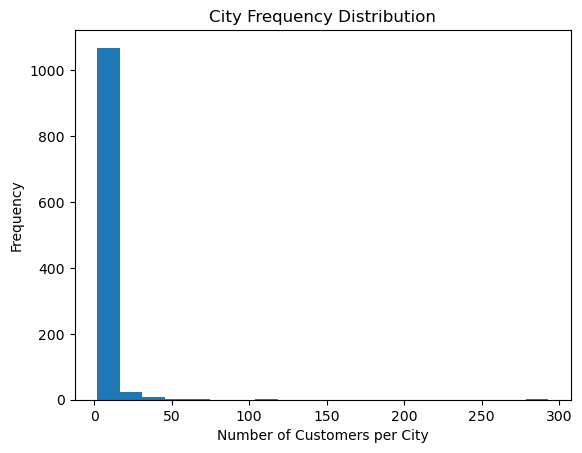

In [ ]:
num_unique_cities = df['City'].nunique()
print(f"Number of unique cities: {num_unique_cities}")

city_summary = df.groupby('City').agg({
    'Monthly Charge': 'mean',
    'Tenure in Months': 'mean',
    'Satisfaction Score': 'mean'
}).reset_index()

print(city_summary.head())

plt.hist(df['City'].value_counts(), bins=20)
plt.title("City Frequency Distribution")
plt.xlabel("Number of Customers per City")
plt.ylabel("Frequency")
plt.show()

City has high cardinality of 1106, a column with over 1000 unique values in a dataset of 7043 rows is unlikely to provide meaningful insights for clustering. 

While cities show some differences in Monthly Charge, Tenure, and Satisfaction Score, these differences may not justify keeping the full cardinality of the City column. 

Our Objective itself are NOT to identify what actions can be undertaken to improve retention ON A SPECIFIC CITY.

The histogram highlights that the distribution is heavily skewed, with a small number of cities having relatively high customer counts while the majority have very low counts.

From the result i can conclude:
- Change birth Date datatype and change it into Age column
- Drop Dependents Column
- Drop City Column

In [20]:
current_year = 2025
df['Age'] = current_year - pd.to_datetime(df['Birth Date']).dt.year
print(df[['Birth Date', 'Age']])

      Birth Date  Age
0     1946/07/17   79
1     1950/11/12   75
2     1953/03/21   72
3     1946/03/08   79
4     1944/04/02   81
...          ...  ...
7038  1994/08/14   31
7039  1986/10/31   39
7040  1994/12/30   31
7041  1992/12/15   33
7042  1980/11/21   45

[7043 rows x 2 columns]


## Drop unused column

In [21]:
df = df.drop(['Total Refunds','Birth Date', 'City'], axis=1)

# Summary

In [22]:
missing_values = df.isnull().mean()*100
data_type = df.dtypes
unique_values_count = df.nunique()
null_count = df.isnull().sum()

summary_1 = pd.DataFrame({
    'Null Count': null_count,
    'Null %': missing_values,
    'Datatype': data_type,
    'Unique value': unique_values_count
})

summary_1.sort_values(by = 'Null %', ascending= False)

Null Count  Null % Datatype  Unique value
Gender                                      0     0.0   object             2
Streaming Movies                            0     0.0   object             2
Refunds_Status                              0     0.0   object             2
Satisfaction Score                          0     0.0    int64             5
Monthly Charge                              0     0.0  float64          1585
Payment Method                              0     0.0   object             3
Paperless Billing                           0     0.0   object             2
Contract                                    0     0.0   object             3
Streaming Music                             0     0.0   object             2
Premium Tech Support                        0     0.0   object             2
Married                                     0     0.0   object             2
Avg Monthly GB Download                     0     0.0    int64            50
Internet Type                               0     0.0   object             4
Internet Service                            0     0.0   object             2
Avg Monthly Long Distance Charges           0     0.0  float64          3584
Tenure in Months                            0     0.0    int64            72
Number of Referrals                         0     0.0    int64            12
Dependents                                  0     0.0   object             2
Age                                         0     0.0    int32            62

# Plotting

Separate numerical and categorical column

In [ ]:
categorical_columns = []
numerical_columns = []

for i in df.columns:
    if i == "Obesity level":
        continue
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

print(f'Categorical: {categorical_columns}\n')
print(f'Numeric: {numerical_columns}')

Categorical: ['Gender', 'Married', 'Dependents', 'Internet Service', 'Internet Type', 'Premium Tech Support', 'Streaming Movies', 'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method', 'Refunds_Status']

Numeric: ['Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Satisfaction Score', 'Age']


## Description of the numerical column

In [24]:
df[numerical_columns].describe()

Number of Referrals  Tenure in Months  \
count          7043.000000       7043.000000   
mean              1.951867         32.386767   
std               3.001199         24.542061   
min               0.000000          1.000000   
25%               0.000000          9.000000   
50%               0.000000         29.000000   
75%               3.000000         55.000000   
max              11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                27.000000   
max                            49.990000                85.000000   

       Monthly Charge  Satisfaction Score          Age  
count     7043.000000         7043.000000  7043.000000  
mean        64.761692            3.244924    47.509726  
std         30.090047            1.201657    16.750352  
min         18.250000            1.000000    20.000000  
25%         35.500000            3.000000    33.000000  
50%         70.350000            3.000000    47.000000  
75%         89.850000            4.000000    61.000000  
max        118.750000            5.000000    81.000000

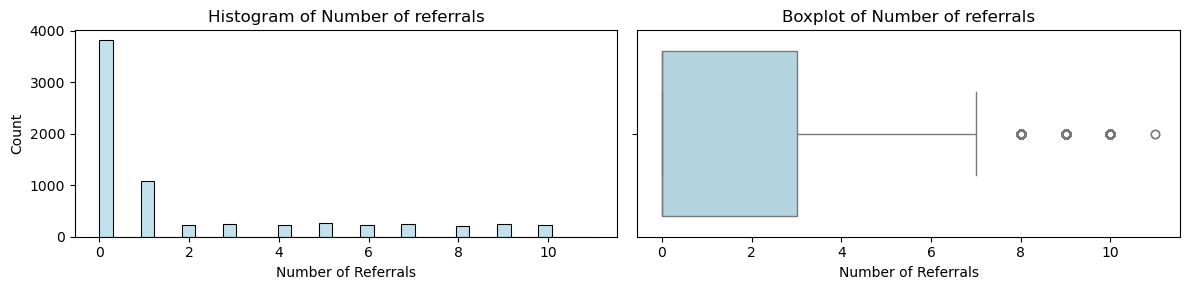

Number of Referrals - Skewness: 1.4460596247412694
Number of Referrals - Kurtosis: 0.721963934087432


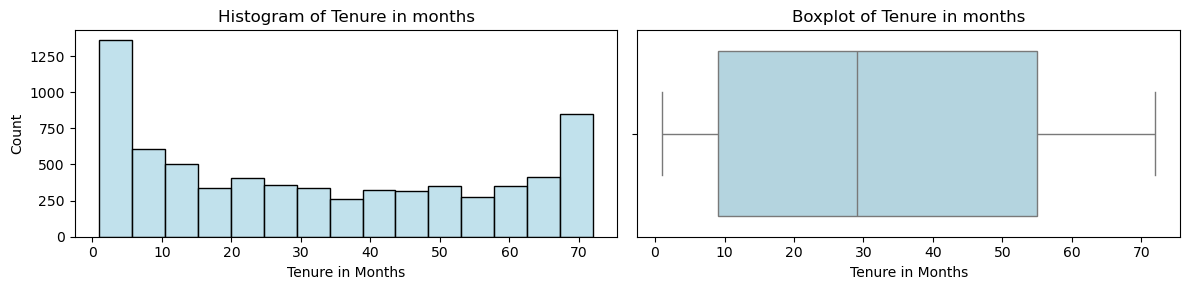

Tenure in Months - Skewness: 0.24054261407486294
Tenure in Months - Kurtosis: -1.3870523608481071


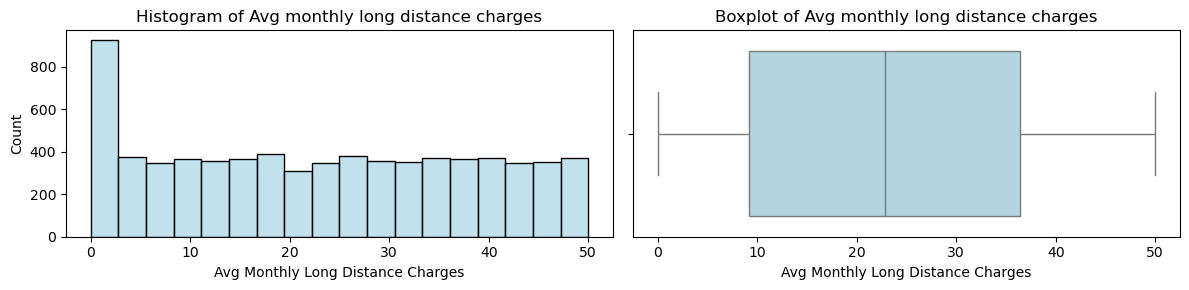

Avg Monthly Long Distance Charges - Skewness: 0.049175899338412654
Avg Monthly Long Distance Charges - Kurtosis: -1.2546544102968529


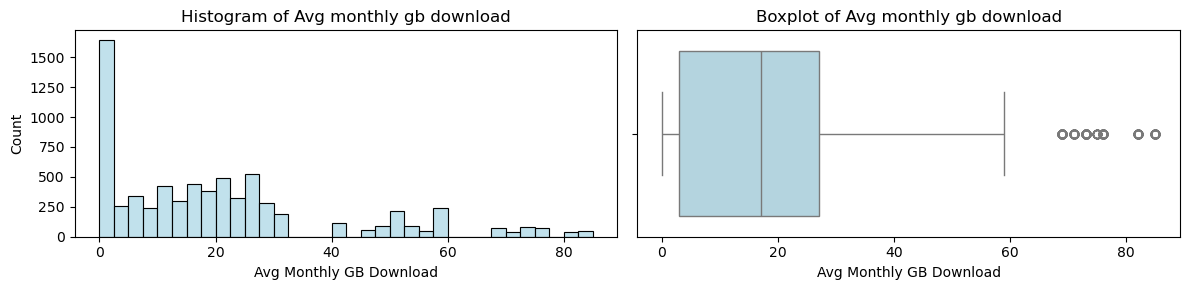

Avg Monthly GB Download - Skewness: 1.2165839031452528
Avg Monthly GB Download - Kurtosis: 0.8815023103111024


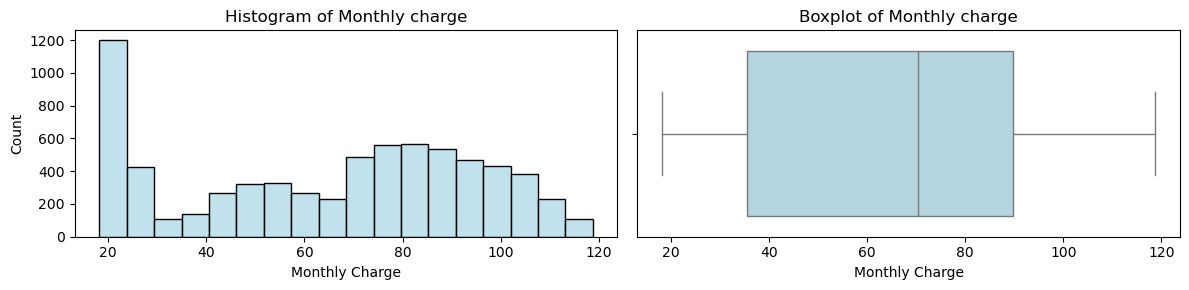

Monthly Charge - Skewness: -0.22052443394398033
Monthly Charge - Kurtosis: -1.2572596945495058


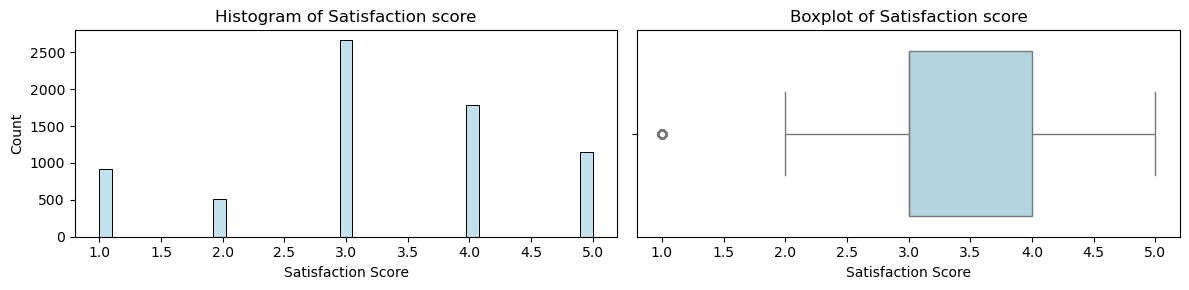

Satisfaction Score - Skewness: -0.3674005424260873
Satisfaction Score - Kurtosis: -0.5368532044523038


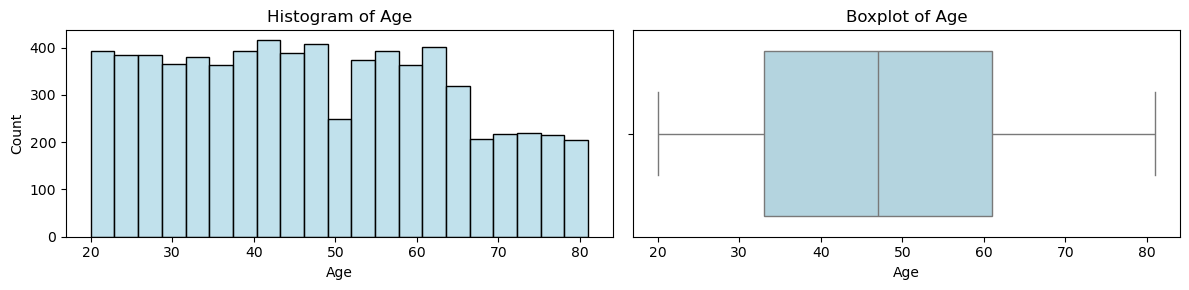

Age - Skewness: 0.16218644867417775
Age - Kurtosis: -1.0028494800368994


In [25]:
for i, var in enumerate(numerical_columns, 1):
    plt.figure(figsize=(12, 3))  
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], color= 'lightblue')  
    plt.title(f"Histogram of {var.capitalize()}")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var], color= 'lightblue')
    plt.title(f"Boxplot of {var.capitalize()}")
    plt.tight_layout()
    plt.show()
    print(f'{var} - Skewness: {df[var].skew()}')
    print(f'{var} - Kurtosis: {df[var].kurt()}')

In [26]:
for i in numerical_columns:
    a = df[i].value_counts()
    print(f'{a}\n')

Number of Referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221
8      213
11       2
Name: count, dtype: int64

Tenure in Months
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

Avg Monthly Long Distance Charges
0.00     682
18.26      7
18.74      6
30.09      6
42.55      6
        ... 
29.21      1
25.64      1
33.30      1
16.44      1
8.62       1
Name: count, Length: 3584, dtype: int64

Avg Monthly GB Download
0     1526
19     220
27     199
30     193
59     192
26     191
23     179
22     172
21     171
18     164
13     164
17     155
16     155
20     151
24     148
28     147
11     145
12     143
29     138
15     132
10     132
14     131
25     130
3      130
4      129
52     121
8      120
9      116
2      116
7      116
5      114
6      114
51      90
53      88
48      86
73      81
69      75
41    

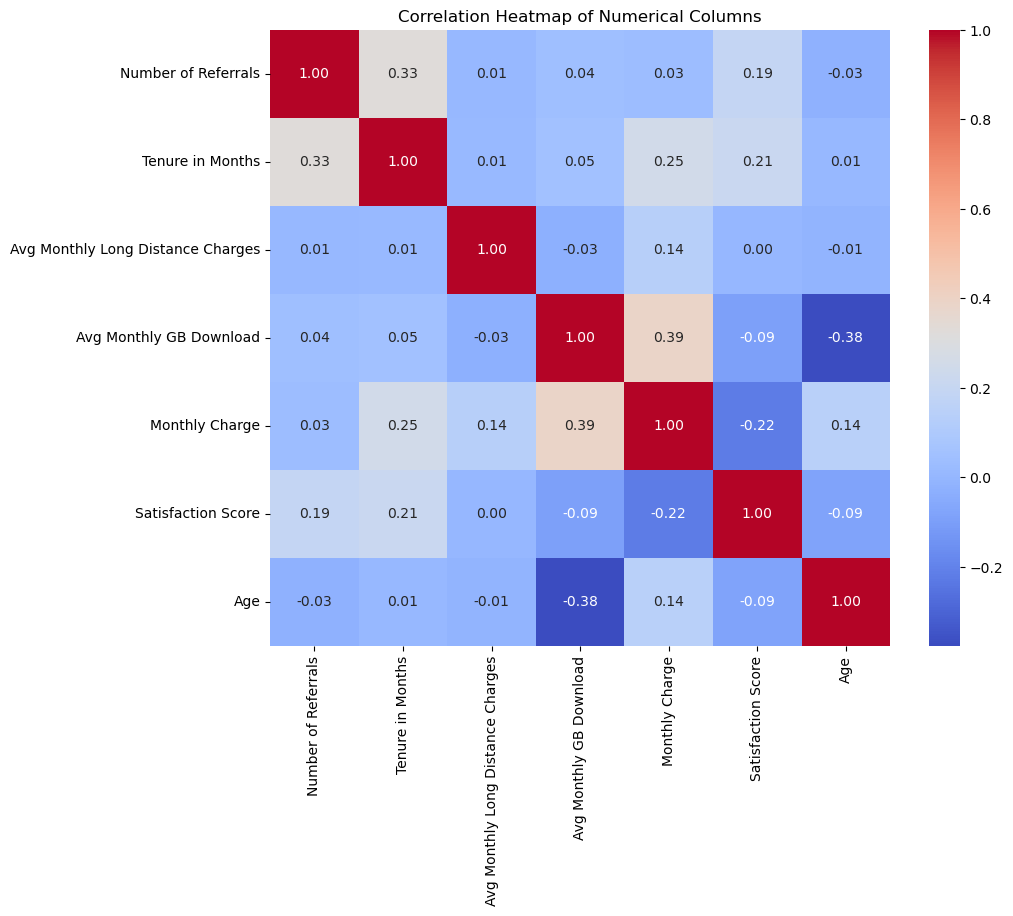

In [ ]:
corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

## Insight

-  A significant number of customers are low-referral, but there is a small group with many referrals. Customers with more referrals might feel more engaged with the service and may be less likely to churn, as they are likely to be satisfied.
- tenures have uniform distribution with a slight concentration of customers around shorter tenures. A higher tenure (e.g., >24 months) is often a sign of more loyal customers. A significant number of customers have been around for over 2 years, suggesting stable usage.
- Avg Monthly Long Distance Charges show a balanced distribution, but with a large number of customers having low long-distance charges.Customers with lower charges might be less engaged, while those with higher charges might be utilizing more services, which could be a sign of higher satisfaction.
- Avg Monthly GB Download indicate a heavy skew towards lower GB download values. A few customers are high downloaders.
- Monthly Charge show that the monthly charges are more uniform across customers, with most having mid-range charges.
- Satisfaction score shows most customers being somewhat satisfied (scores of 3 or 4).
- Age may correlate with customer stability by the skewness. Younger customers might churn more frequently due to more flexible options, while older customers may value stability more.
- There are no major strong correlation from the correlation plot meaning it doesn't need more adjustment. Because variables with strong correlations may provide redundant information and could be removed or adjusted to improve model performance.


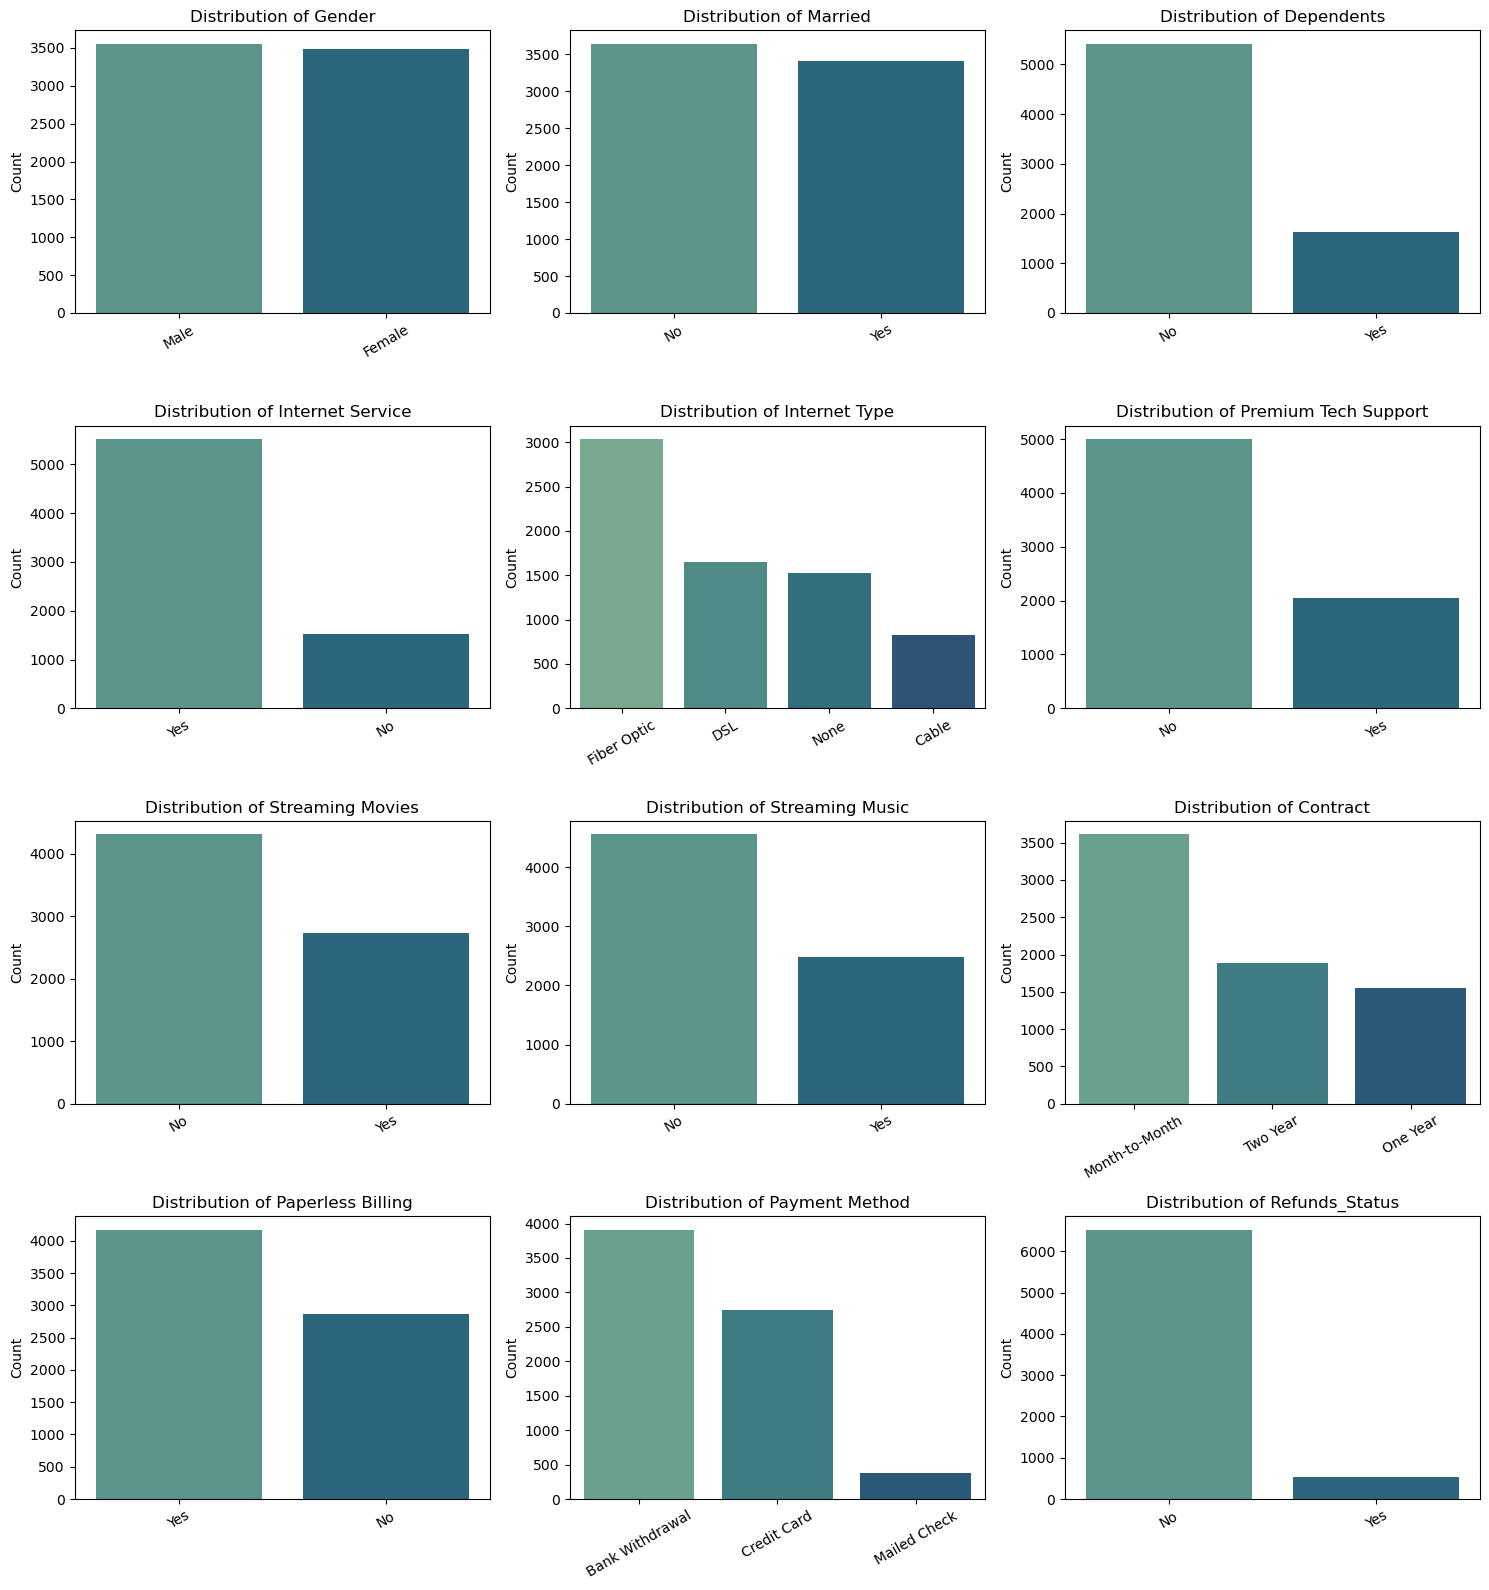

In [ ]:
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  

for i, column in enumerate(categorical_columns):
    ax = axes[i]  
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=ax, palette="crest")
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=30)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [29]:
for i in categorical_columns:
    a = df[i].value_counts()
    print(f'{a}\n')

Gender
Male      3555
Female    3488
Name: count, dtype: int64

Married
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

Internet Service
Yes    5517
No     1526
Name: count, dtype: int64

Internet Type
Fiber Optic    3035
DSL            1652
None           1526
Cable           830
Name: count, dtype: int64

Premium Tech Support
No     4999
Yes    2044
Name: count, dtype: int64

Streaming Movies
No     4311
Yes    2732
Name: count, dtype: int64

Streaming Music
No     4555
Yes    2488
Name: count, dtype: int64

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64

Payment Method
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64

Refunds_Status
No     6518
Yes     525
Name: count, dtype: int64



## Insight

- Column Gender, Marital Status appears almost equallly balance between the unqiue variables. 
- Most of the customers don't have any dependents towards the company.
- A vast majority of customers have internet service, which is a key service that could impact customer retention and satisfaction.
- The largest group uses fiber optic connections, which are generally faster and more reliable. Customers with cable or no internet might be at a higher risk of churn or dissatisfaction, especially if the service is slow or unavailable. 
- More than double the number of customers do not use premium tech support.
- Both Streaming movies & Music shows that a significant portion of customers do not engage about it. This This might indicate that these services are secondary to the core offering.
- Month-to-month contracts represent the largest group, which might suggest a higher risk of churn, as these customers can leave easily. 
- A majority of customers prefer paperless billing, which aligns with changes into modern trends.
- The vast majority use bank withdrawals or credit cards for payment. Mailed checks are quite rare, which could suggest either an older demographic or less digitally-engaged customers.
- Very few customers have received refunds, which could suggest that the service is generally satisfactory, or that refunds are not a common occurrence.

# Data Preprocessing

## Encoding

In [30]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['Internet Service'] = df['Internet Service'].map({'No': 0, 'Yes': 1})
df['Internet Type'] = df['Internet Type'].map({'Cable':3, 'DSL':2, 'Fiber Optic':1, 'None': 0}) 
df['Premium Tech Support'] = df['Premium Tech Support'].map({'No': 0, 'Yes': 1})
df['Streaming Movies'] = df['Streaming Movies'].map({'No': 0, 'Yes': 1})
df['Streaming Music'] = df['Streaming Music'].map({'No': 0, 'Yes': 1})
df['Contract'] = df['Contract'].map({'Month-to-Month':0, 'One Year':1, 'Two Year':2})
df['Paperless Billing'] = df['Paperless Billing'].map({'No': 0, 'Yes': 1})
df['Payment Method'] = df['Payment Method'].map({'Bank Withdrawal':2, 'Credit Card':1, 'Mailed Check':0}) 
df['Refunds_Status'] = df['Refunds_Status'].map({'No': 0, 'Yes': 1})

I did some binary and ordinal encoding on some of the categorical data.

## Scaling

I also did scaling with standard scaler

In [ ]:
scaler = StandardScaler()

scaled_values = scaler.fit_transform(df[numerical_columns])
scaled_df = pd.DataFrame(scaled_values, columns=numerical_columns)

df[numerical_columns] = scaled_df

In [32]:
df

Gender  Married  Dependents  Number of Referrals  Tenure in Months  \
0          1        0           0            -0.650409         -1.278988   
1          0        1           1            -0.317185         -0.993743   
2          1        0           1            -0.650409         -0.586250   
3          0        1           1            -0.317185         -0.301005   
4          0        1           1            -0.317185          0.187986   
...      ...      ...         ...                  ...               ...   
7038       0        0           0            -0.650409          1.614210   
7039       1        1           1            -0.317185         -0.341755   
7040       0        1           1             0.682487          1.614210   
7041       0        1           1            -0.317185         -0.871495   
7042       1        0           0            -0.650409          1.369715   

      Avg Monthly Long Distance Charges  Internet Service  Internet Type  \
0                             -1.486303                 1              2   
1                              1.676120                 1              1   
2                             -0.752828                 1              1   
3                             -0.207092                 1              1   
4                             -1.076516                 1              1   
...                                 ...               ...            ...   
7038                          -0.012232                 0              0   
7039                           0.847481                 1              3   
7040                           0.433808                 1              1   
7041                          -1.486303                 1              2   
7042                           0.517967                 1              1   

      Avg Monthly GB Download  Premium Tech Support  Streaming Movies  \
0                   -0.612975                     0                 1   
1                   -0.172176                     0                 0   
2                    1.542040                     0                 1   
3                   -0.417064                     0                 1   
4                   -0.319109                     0                 0   
...                       ...                   ...               ...   
7038                -1.004796                     0                 0   
7039                 0.170667                     1                 1   
7040                 1.884884                     0                 1   
7041                -0.172176                     0                 0   
7042                -0.466042                     1                 1   

      Streaming Music  Contract  Paperless Billing  Payment Method  \
0                   0         0                  1               2   
1                   0         0                  1               1   
2                   1         0                  1               2   
3                   0         0                  1               2   
4                   0         0                  1               2   
...               ...       ...                ...             ...   
7038                0         2                  1               2   
7039                1         1                  1               0   
7040                1         1                  1               1   
7041                0         0                  1               2   
7042                1         2                  1               2   

      Monthly Charge  Satisfaction Score  Refunds_Status       Age  
0          -0.834611           -0.203836               0  1.880110  
1           0.528063           -0.203836               0  1.641292  
2           1.019955           -1.036080               1  1.462179  
3           1.121324           -1.036080               1  1.880110  
4           0.390134           -1.036080               0  1.999519  
...              ...                 ...        

# Dimensionality Reduction

In [33]:
pca = PCA()
pca.fit(df)

PCA()

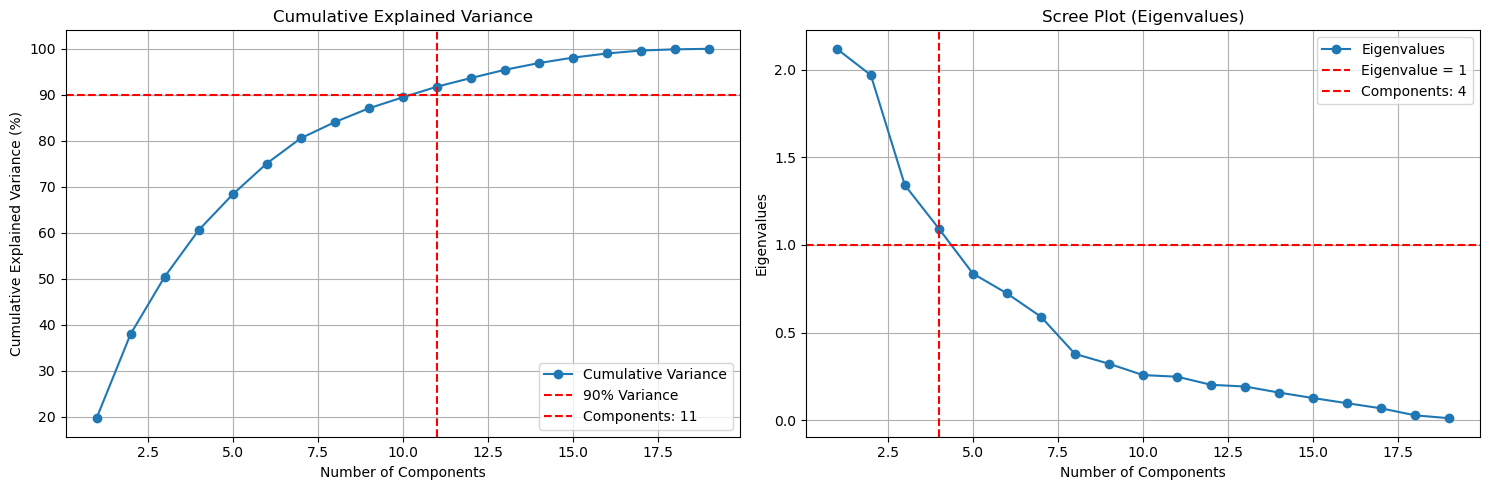

Number of components for 90% variance: 11
Number of components with eigenvalues > 1: 4


In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_ * 100)
eigenvalues = pca.explained_variance_

num_components_90_variance = np.argmax(cumulative_variance >= 90) + 1
num_components_eigenvalues = np.sum(eigenvalues > 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(90, color='red', linestyle='--', label='90% Variance')
plt.axvline(num_components_90_variance, color='red', linestyle='--', label=f'Components: {num_components_90_variance}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance')
plt.legend()

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', label='Eigenvalues')
plt.axhline(1, color='red', linestyle='--', label='Eigenvalue = 1')
plt.axvline(num_components_eigenvalues, color='red', linestyle='--', label=f'Components: {num_components_eigenvalues}')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot (Eigenvalues)')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Number of components for 90% variance: {num_components_90_variance}")
print(f"Number of components with eigenvalues > 1: {num_components_eigenvalues}")


I decided to use 4 number of component to retains only the most impactful dimensions. This drastically reduces dimensionality and might be preferable when simplicity or interpretability is key, especially in clustering tasks like K-Means, where fewer dimensions often result in better-defined clusters.

In [35]:
pca_comp = PCA(n_components=4)

df_pca = pca_comp.fit_transform(df)

# Fine Tuning

## Elbow Method

In [ ]:
def calculate_elbow(data, k_range, random_state=42):
    Sum_of_squared_distances = []
    for num_clusters in k_range:

        kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
        kmeans.fit(data)
        Sum_of_squared_distances.append(kmeans.inertia_)
    return Sum_of_squared_distances

k_range = range(1, 11)
Sum_of_squared_distances = calculate_elbow(df_pca, k_range)

## Silhouette Method

In [ ]:
def calculate_silhouette(data, k_range, random_state=42):
    silhouette_avg = []
    for num_clusters in k_range:
        # Initialize KMeans
        kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
        kmeans.fit(data)
        cluster_labels = kmeans.labels_
        
        # Calculate silhouette score
        score = silhouette_score(data, cluster_labels)
        silhouette_avg.append(score)

    # Find the optimal k with the highest silhouette score
    optimal_k = k_range[np.argmax(silhouette_avg)]
    print(f"Optimal number of clusters (Silhouette Score): {optimal_k}")
    return silhouette_avg, optimal_k

# Example usage
k_range = range(2, 11)
silhouette_avg, optimal_k_silhouette = calculate_silhouette(df_pca, k_range)

Optimal number of clusters (Silhouette Score): 2


## Gap Statistic Method

In [ ]:
def calculate_gap_statistic(data, k_max, nrefs=10, random_state=42):
    np.random.seed(random_state)
    gaps = np.zeros((k_max,))
    within_dispersion = []

    for k in range(1, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(data)
        within_dispersion.append(kmeans.inertia_)

    for k in range(1, k_max + 1):
        reference_dispersion = np.zeros(nrefs)
        for l in range(nrefs):
    
            random_data = np.random.uniform(low=np.min(data, axis=0), 
                                            high=np.max(data, axis=0), 
                                            size=data.shape)
            kmeans = KMeans(n_clusters=k, random_state=random_state)
            kmeans.fit(random_data)
            reference_dispersion[l] = kmeans.inertia_


        ref_disp_mean = np.mean(np.log(reference_dispersion))
        actual_disp_log = np.log(within_dispersion[k - 1])
        gaps[k - 1] = ref_disp_mean - actual_disp_log

    optimal_k = np.argmax(gaps) + 1
    print(f"Optimal number of clusters (Gap Statistic): {optimal_k}")
    return gaps, optimal_k
k_max = 10
gaps, optimal_k_gap = calculate_gap_statistic(df_pca, k_max)


Optimal number of clusters (Gap Statistic): 7


## Plot

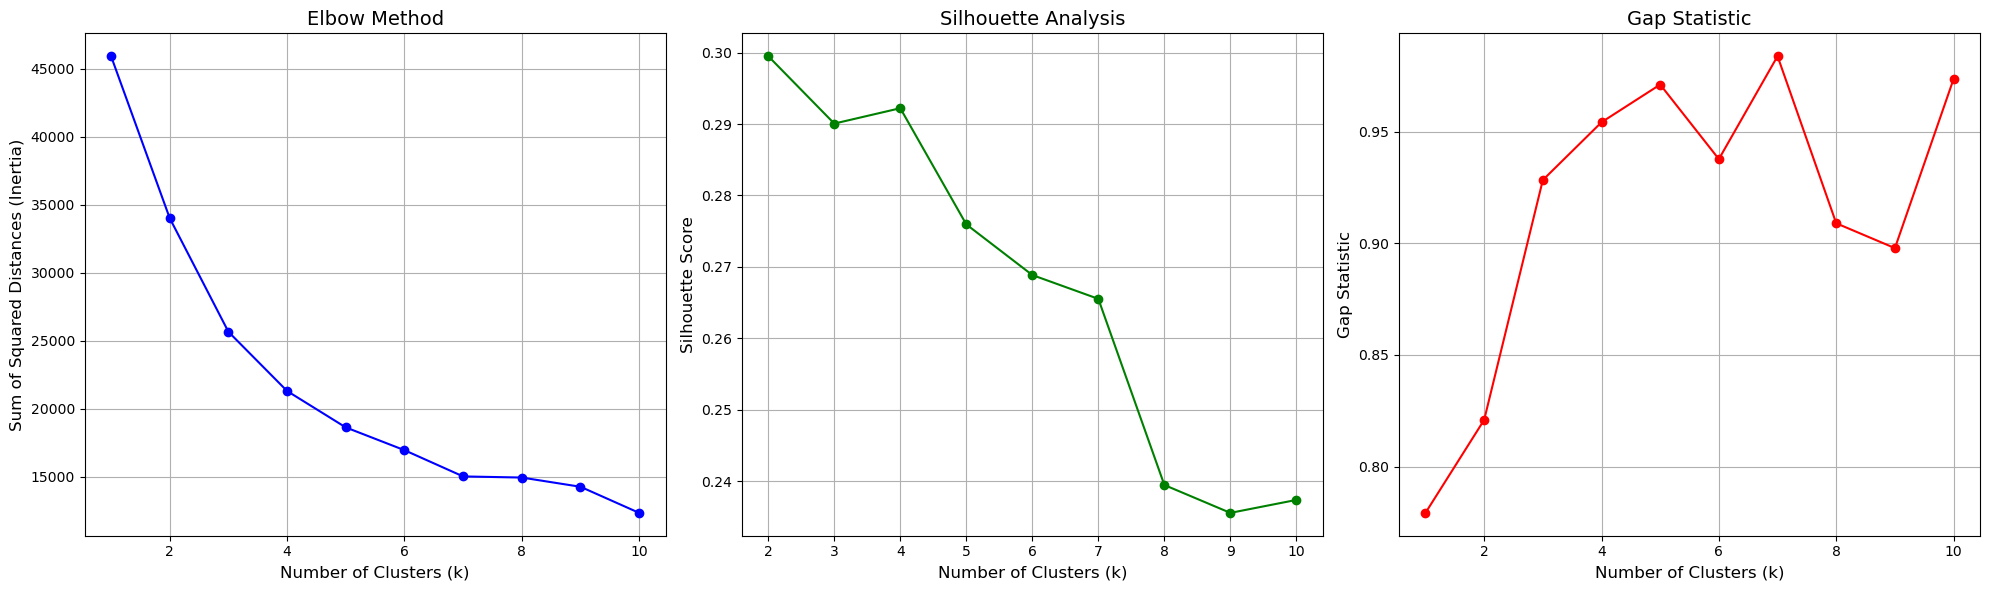

In [ ]:
k_range = range(1, 11) 

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].plot(k_range, Sum_of_squared_distances, 'bx-', marker='o', color='blue')
axs[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[0].set_ylabel('Sum of Squared Distances (Inertia)', fontsize=12)
axs[0].set_title('Elbow Method', fontsize=14)
axs[0].grid(True)

k_range = range(2,11) 
axs[1].plot(k_range, silhouette_avg, 'bx-', marker='o', color='green')
axs[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[1].set_ylabel('Silhouette Score', fontsize=12)
axs[1].set_title('Silhouette Analysis', fontsize=14)
axs[1].grid(True)

axs[2].plot(range(1, k_max + 1), gaps, 'bx-', marker='o', color='red')
axs[2].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[2].set_ylabel('Gap Statistic', fontsize=12)
axs[2].set_title('Gap Statistic', fontsize=14)
axs[2].grid(True)

plt.tight_layout()
plt.show()

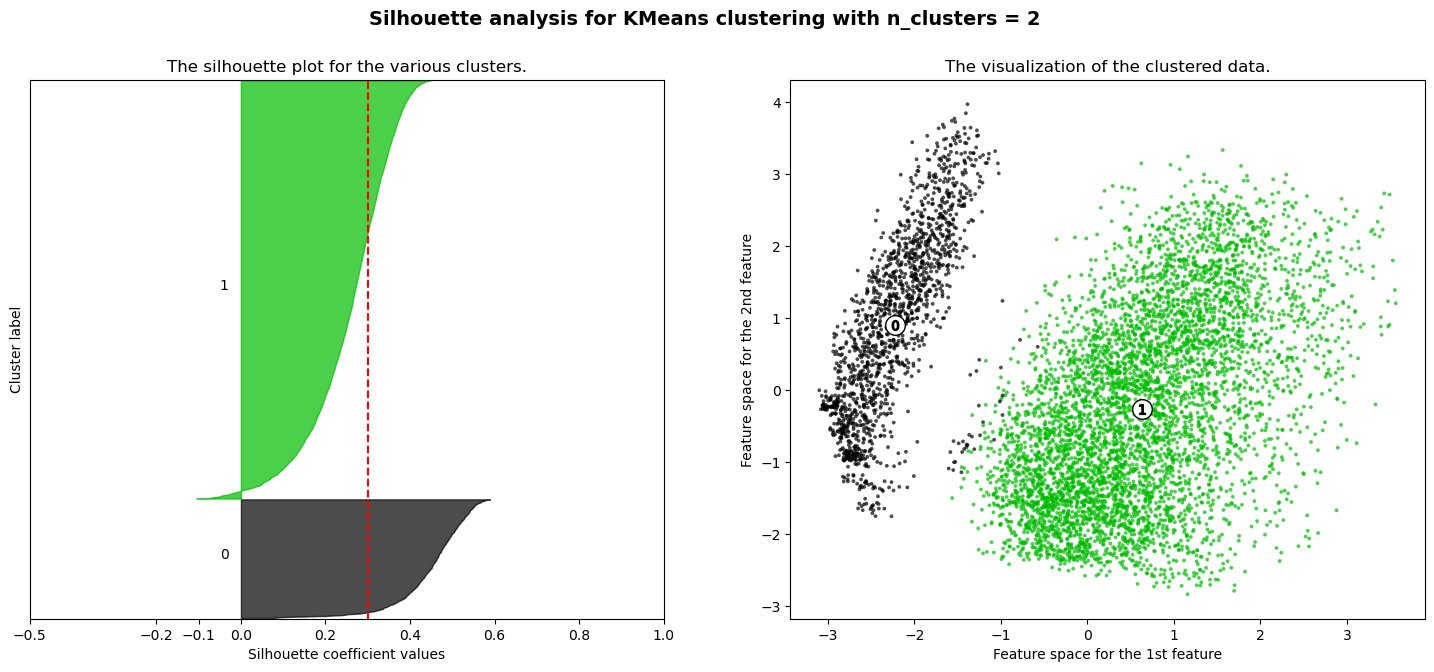

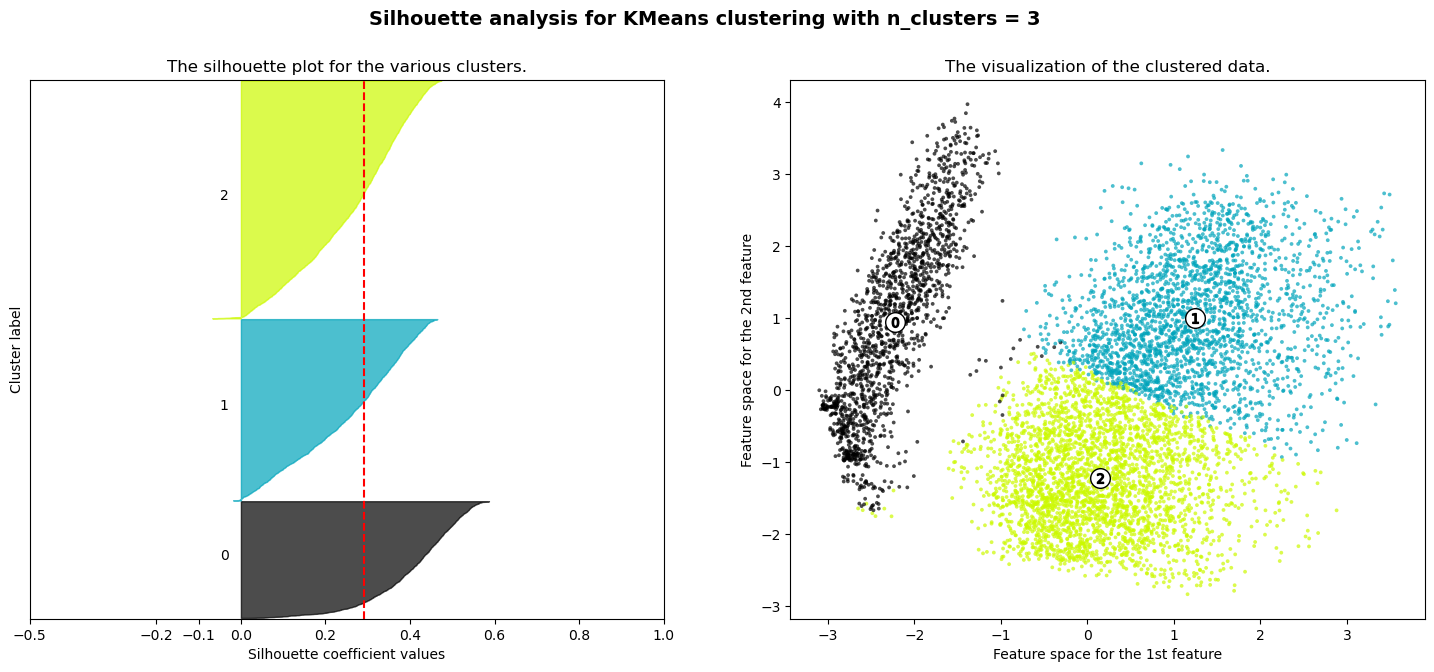

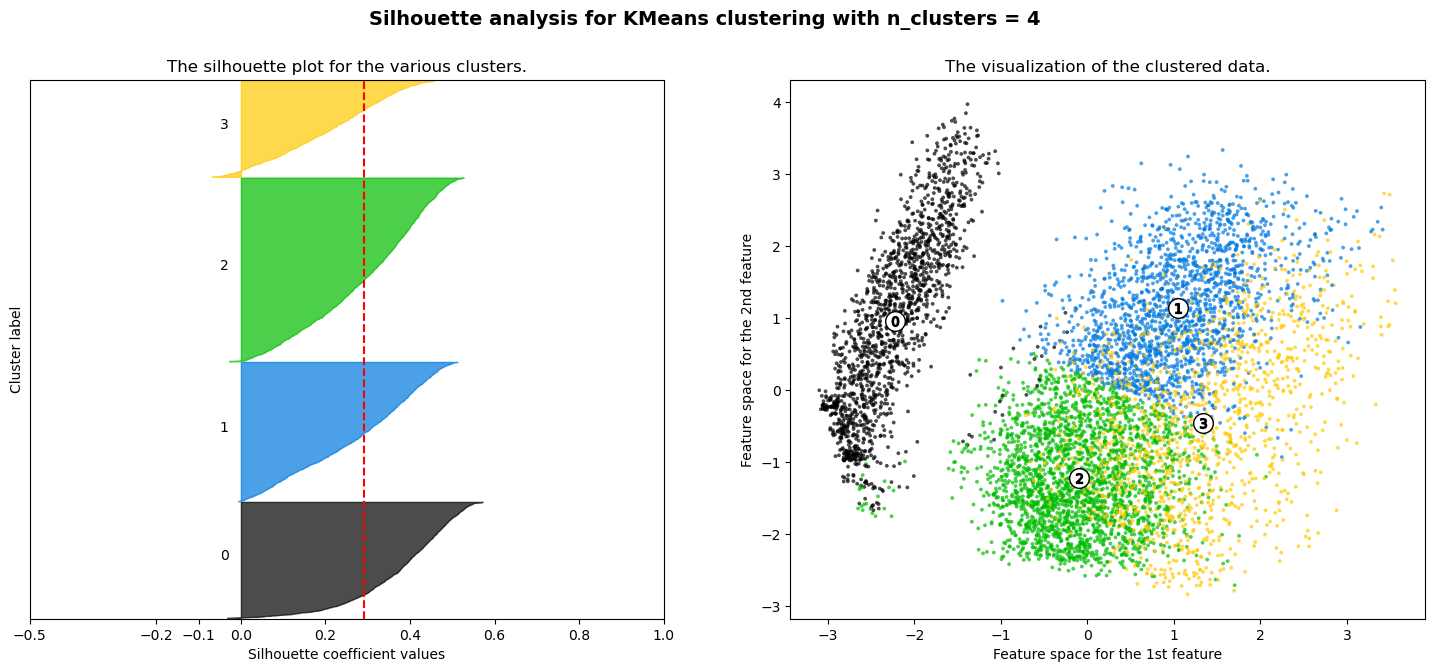

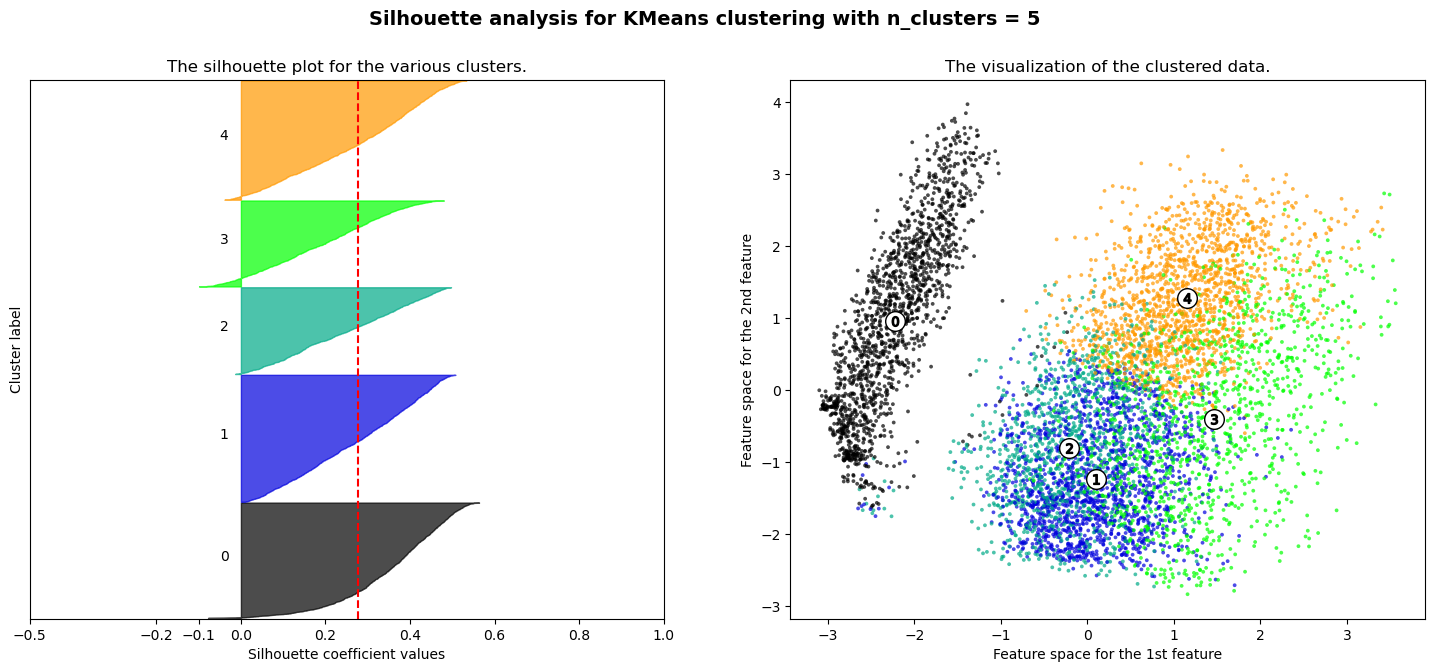

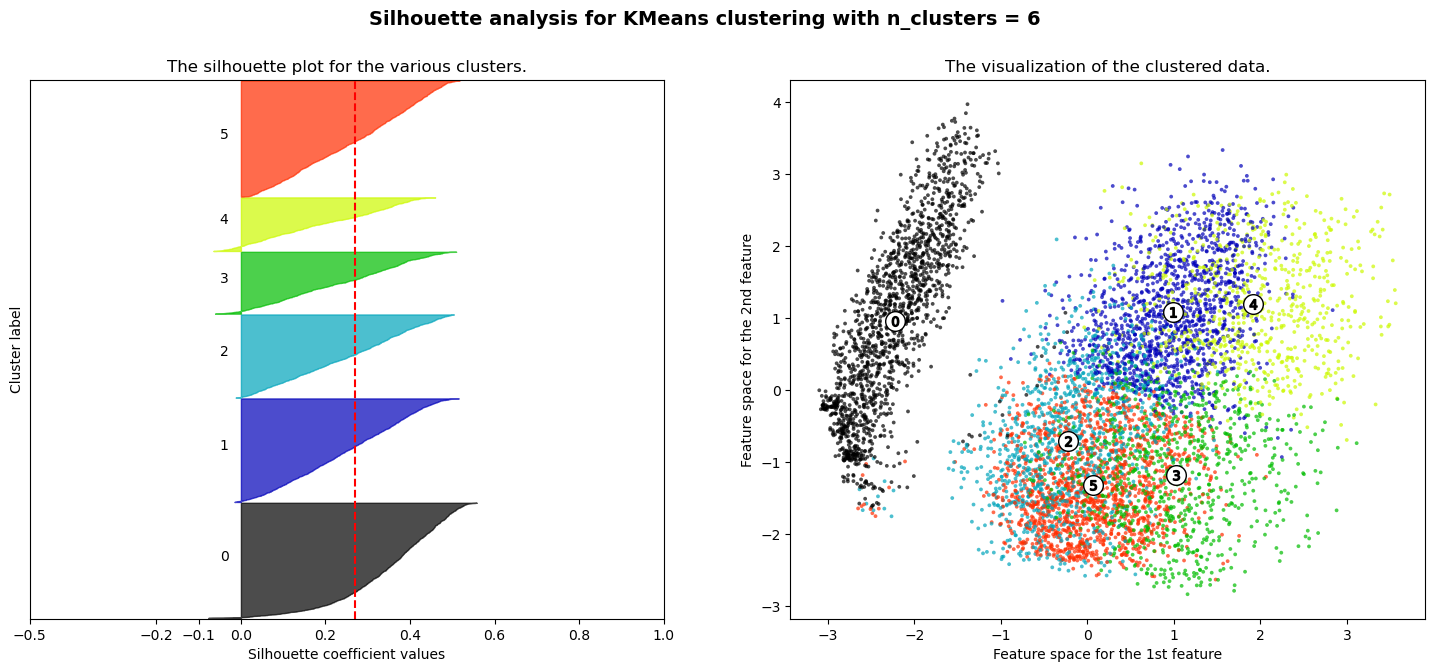

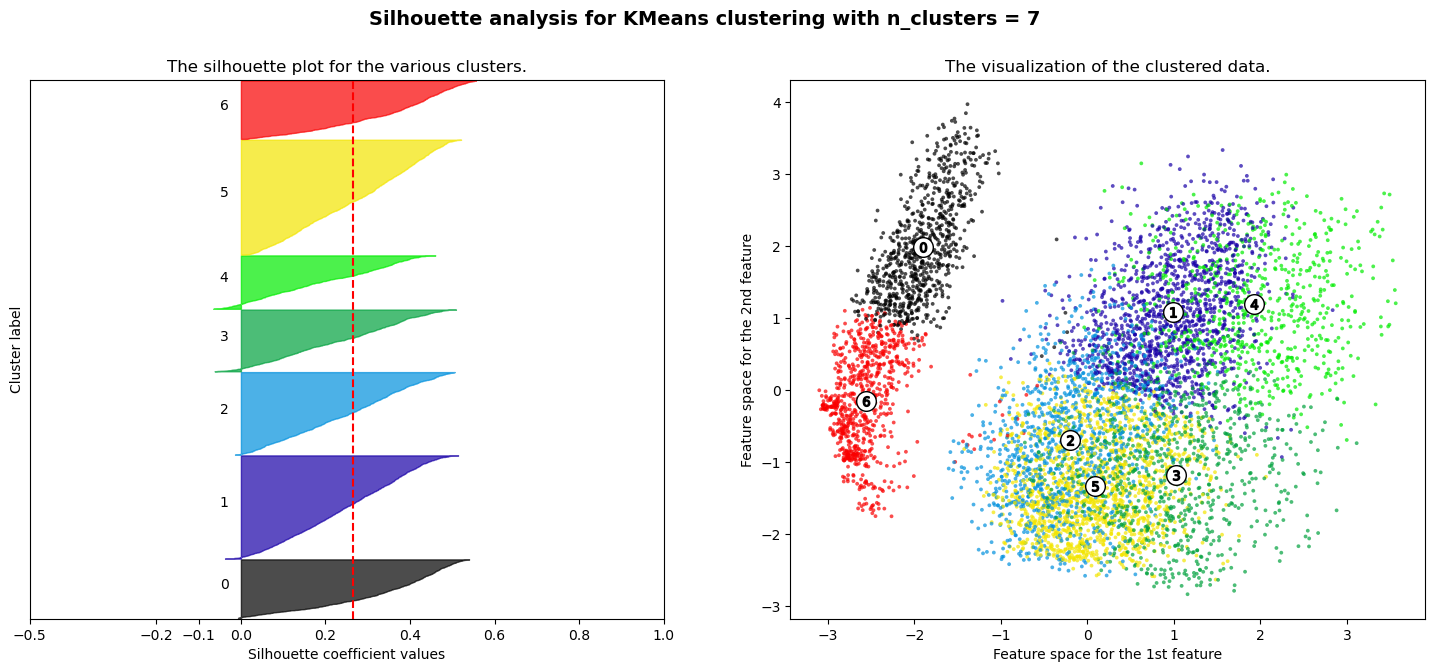

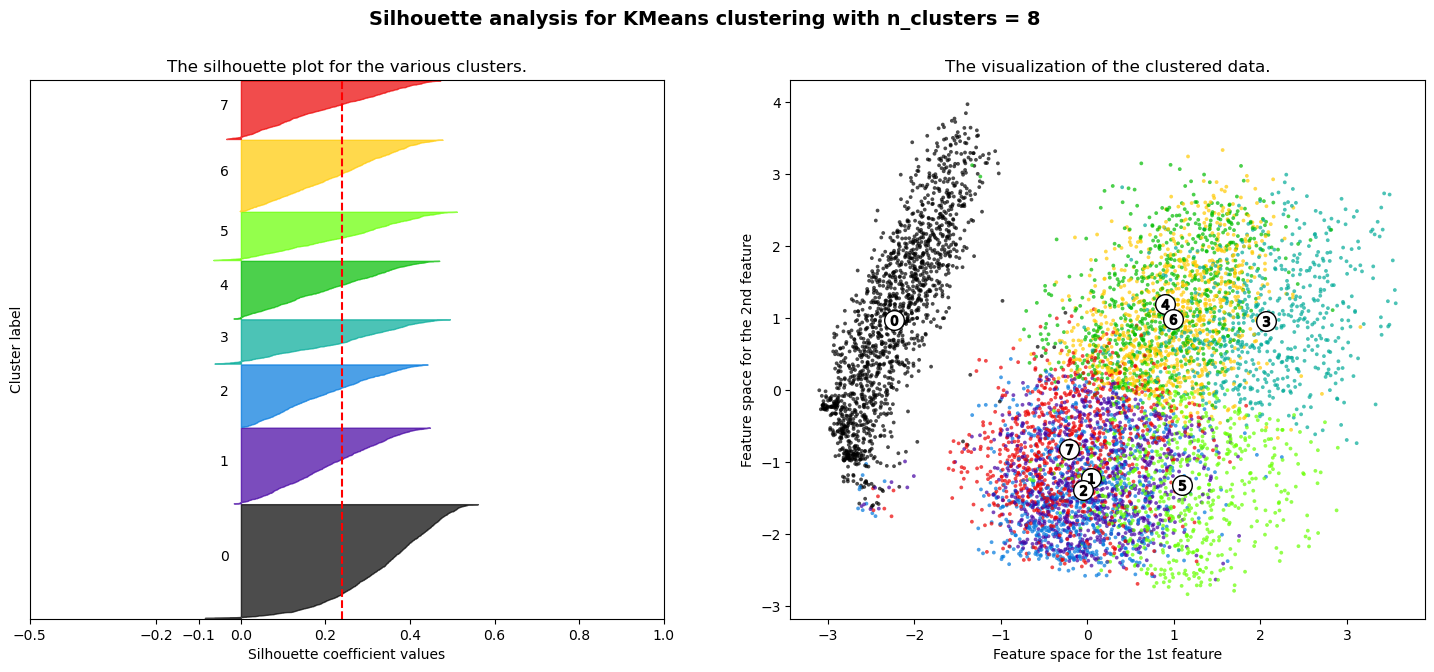

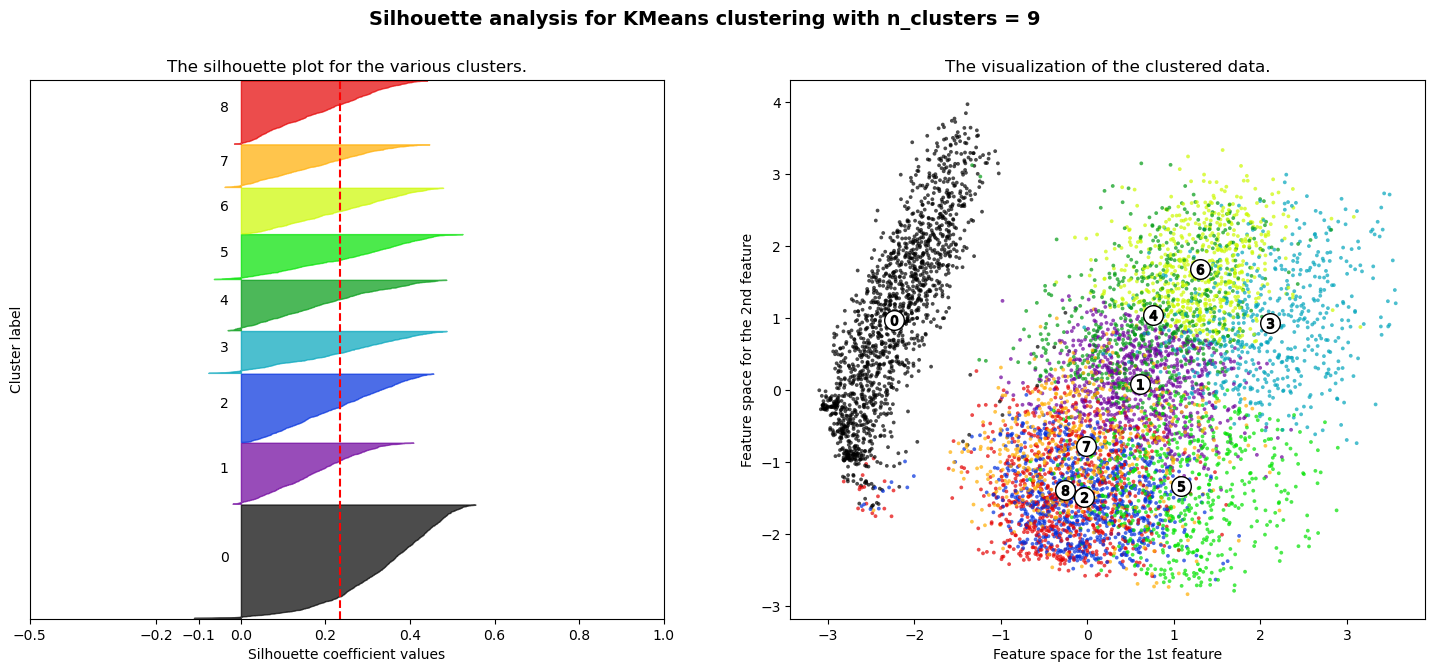

In [ ]:
K = range(2,10)
for n_clusters in K:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=SEED)
    cluster_labels = clusterer.fit_predict(df_pca)

    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.5, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    pca_2d = PCA(n_components=2)
    df_pca_2d = pca_2d.fit_transform(df_pca)
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    ax2.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    centers = clusterer.cluster_centers_

    centers_2d = pca_2d.transform(centers)
    ax2.scatter(centers_2d[:, 0], centers_2d[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers_2d):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
        fontsize=14,
        fontweight="bold"
    )

plt.show()

Based on the visual plot, Silhouette and Elbow Method suggest the number of clusters (k) of 2, meanawhile Gap Statistic Method suggest to use the number of clusters of 7. With most of the apporach suggesting 2, lets perform our further analysis.

# Modelling

In [42]:
model = KMeans(n_clusters = 2, random_state = SEED)
pred = model.fit_predict(df_pca)
df_kmeans = df.copy()
df_kmeans['cluster']=pred

In [43]:
df_kmeans.head()

Gender  Married  Dependents  Number of Referrals  Tenure in Months  \
0       1        0           0            -0.650409         -1.278988   
1       0        1           1            -0.317185         -0.993743   
2       1        0           1            -0.650409         -0.586250   
3       0        1           1            -0.317185         -0.301005   
4       0        1           1            -0.317185          0.187986   

   Avg Monthly Long Distance Charges  Internet Service  Internet Type  \
0                          -1.486303                 1              2   
1                           1.676120                 1              1   
2                          -0.752828                 1              1   
3                          -0.207092                 1              1   
4                          -1.076516                 1              1   

   Avg Monthly GB Download  Premium Tech Support  Streaming Movies  \
0                -0.612975                     0                 1   
1                -0.172176                     0                 0   
2                 1.542040                     0                 1   
3                -0.417064                     0                 1   
4                -0.319109                     0                 0   

   Streaming Music  Contract  Paperless Billing  Payment Method  \
0                0         0                  1               2   
1                0         0                  1               1   
2                1         0                  1               2   
3                0         0                  1               2   
4                0         0                  1               2   

   Monthly Charge  Satisfaction Score  Refunds_Status       Age  cluster  
0       -0.834611           -0.203836               0  1.880110        1  
1        0.528063           -0.203836               0  1.641292        1  
2        1.019955           -1.036080               1  1.462179        1  
3        1.121324           -1.036080               1  1.880110        1  
4        0.390134           -1.036080               0  1.999519        1

<Axes: >

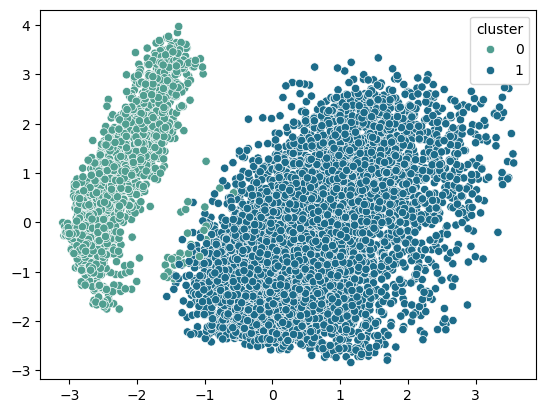

In [44]:
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_kmeans['cluster'], palette='crest')

## Plot distribution cluster againts all features

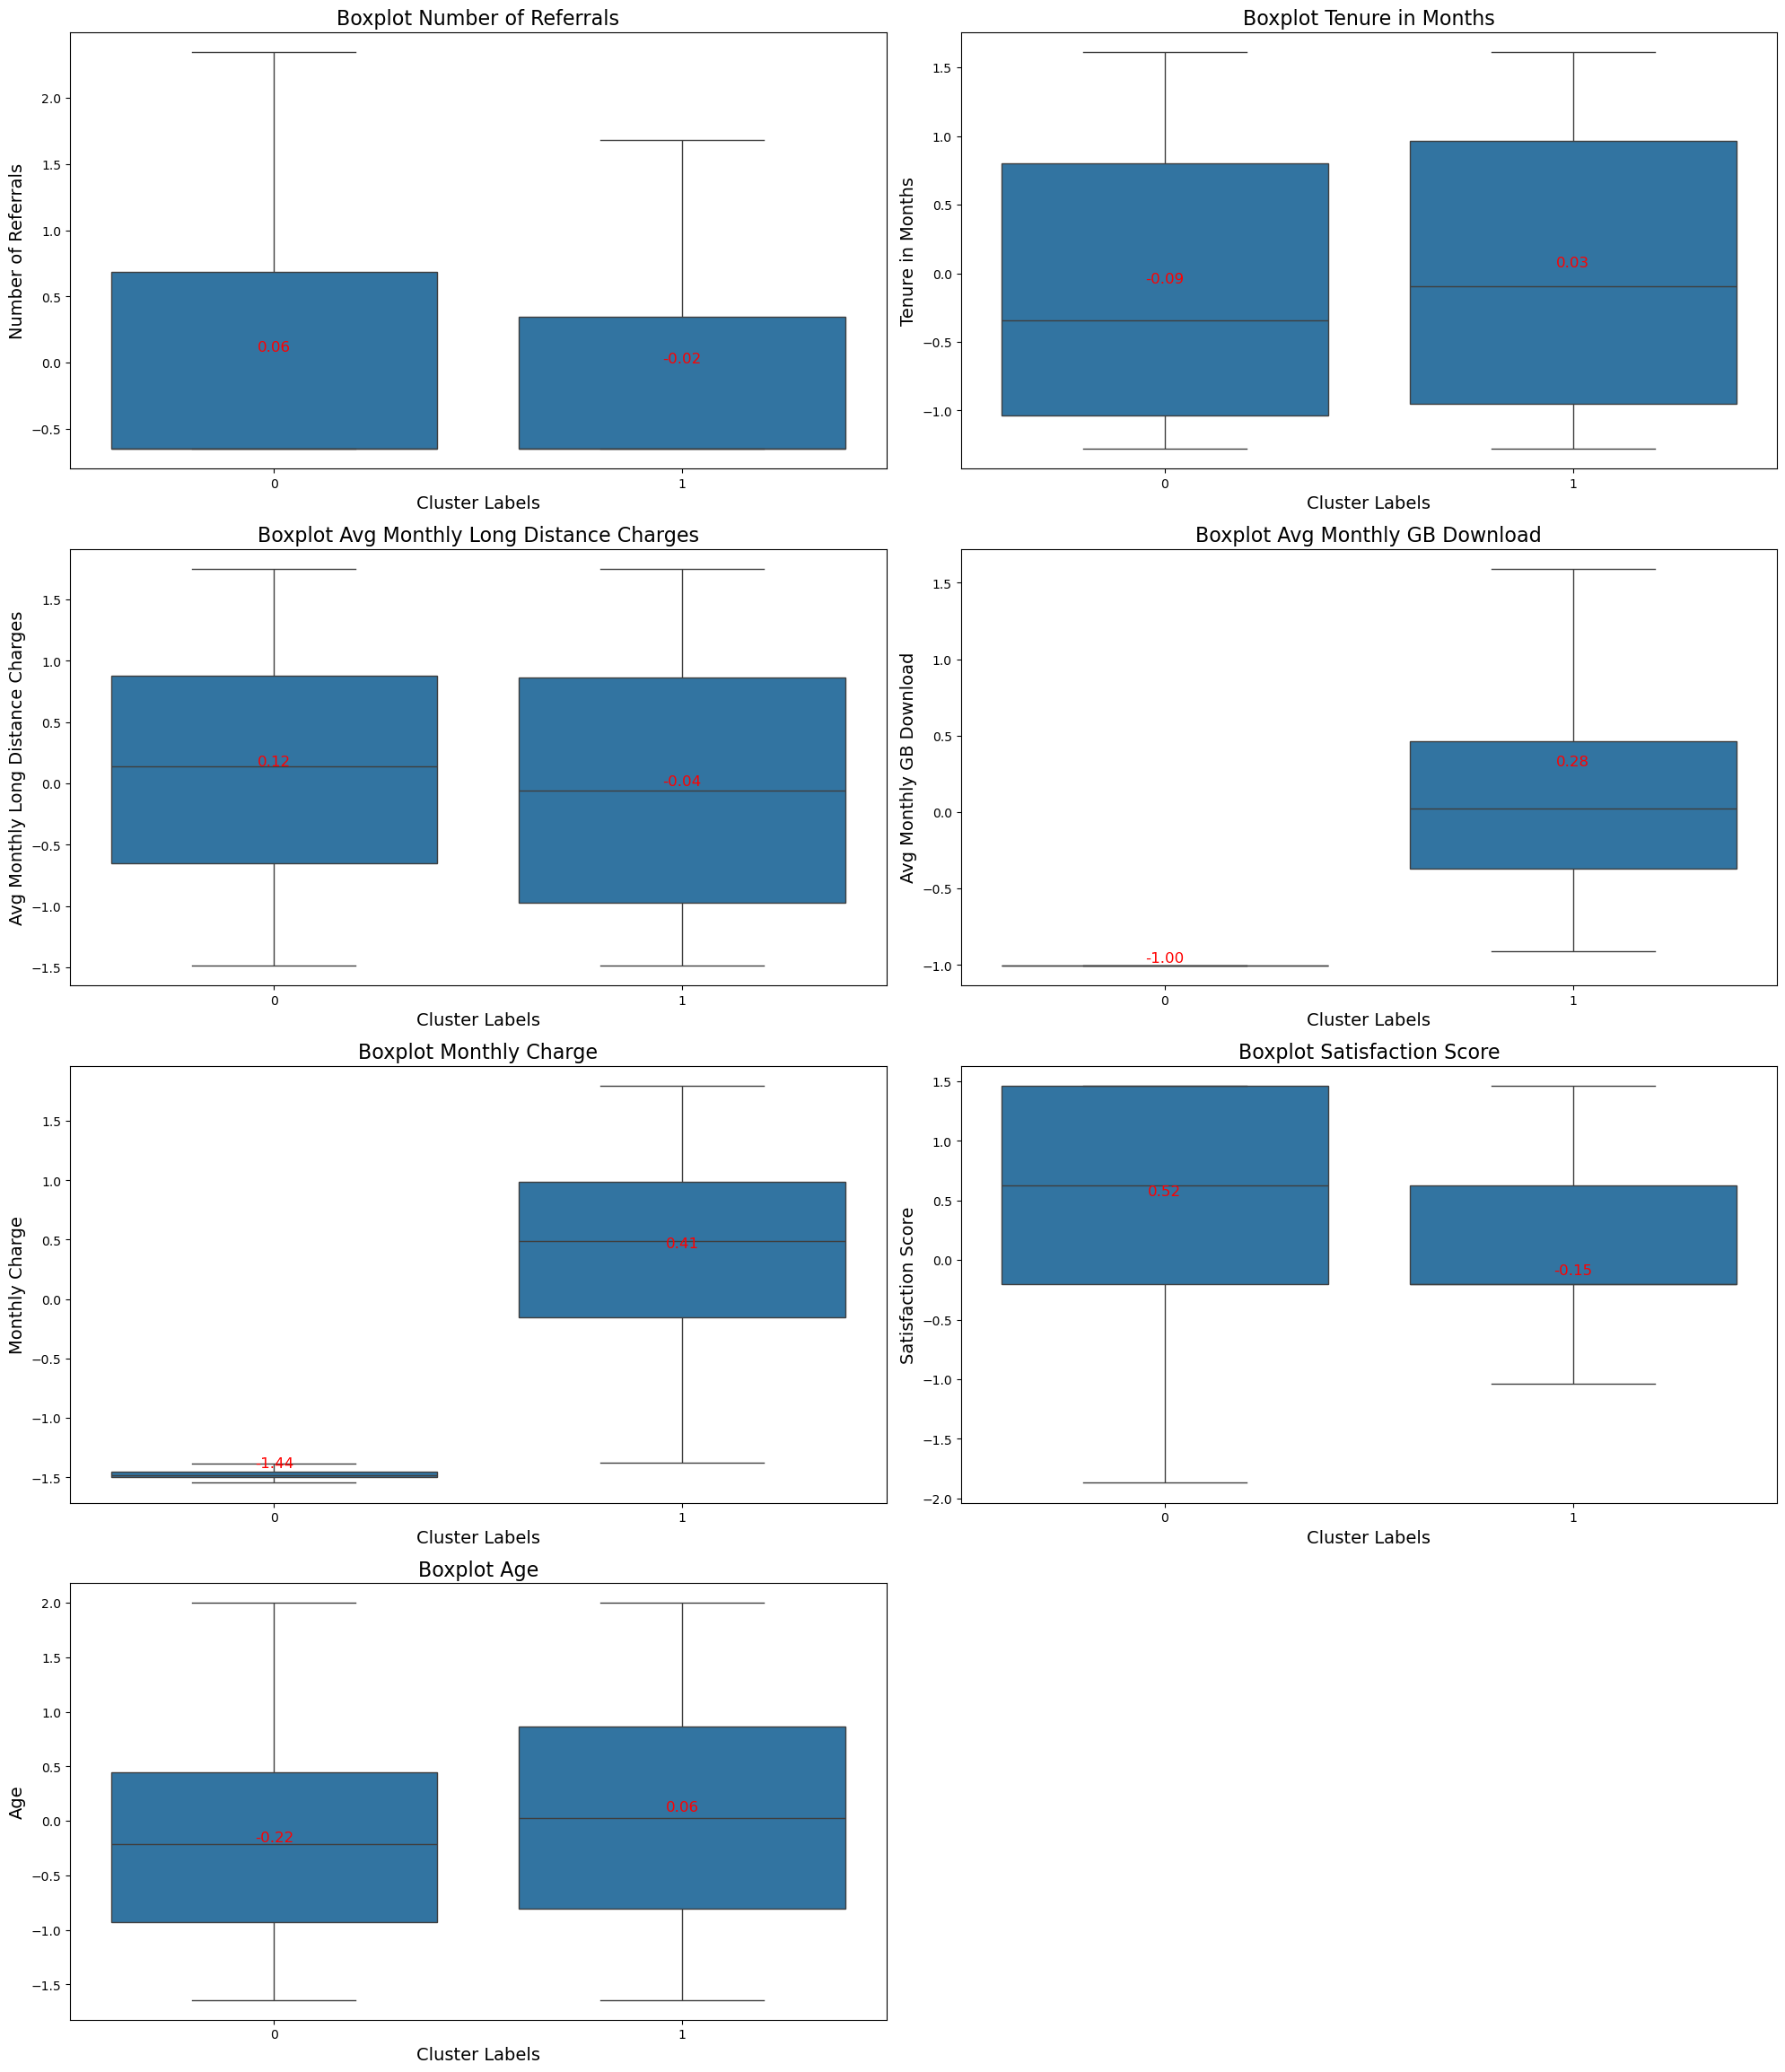

In [ ]:
plt.figure(figsize=(20, 40))
for i, fitur in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns),2, i)
    sns.boxplot(x='cluster', y=fitur, data=df_kmeans, showfliers=False) 
    plt.xlabel('Cluster Labels', fontsize=14)
    plt.ylabel(fitur, fontsize=14)
    plt.title(f'Boxplot {fitur}', fontsize=16)
    
    means = df_kmeans.groupby('cluster')[fitur].mean().values
    for j, mean in enumerate(means):
        plt.text(j, mean, f'{mean:.2f}', ha='center', va='bottom', color='red', fontsize=12)

plt.tight_layout()
plt.show()

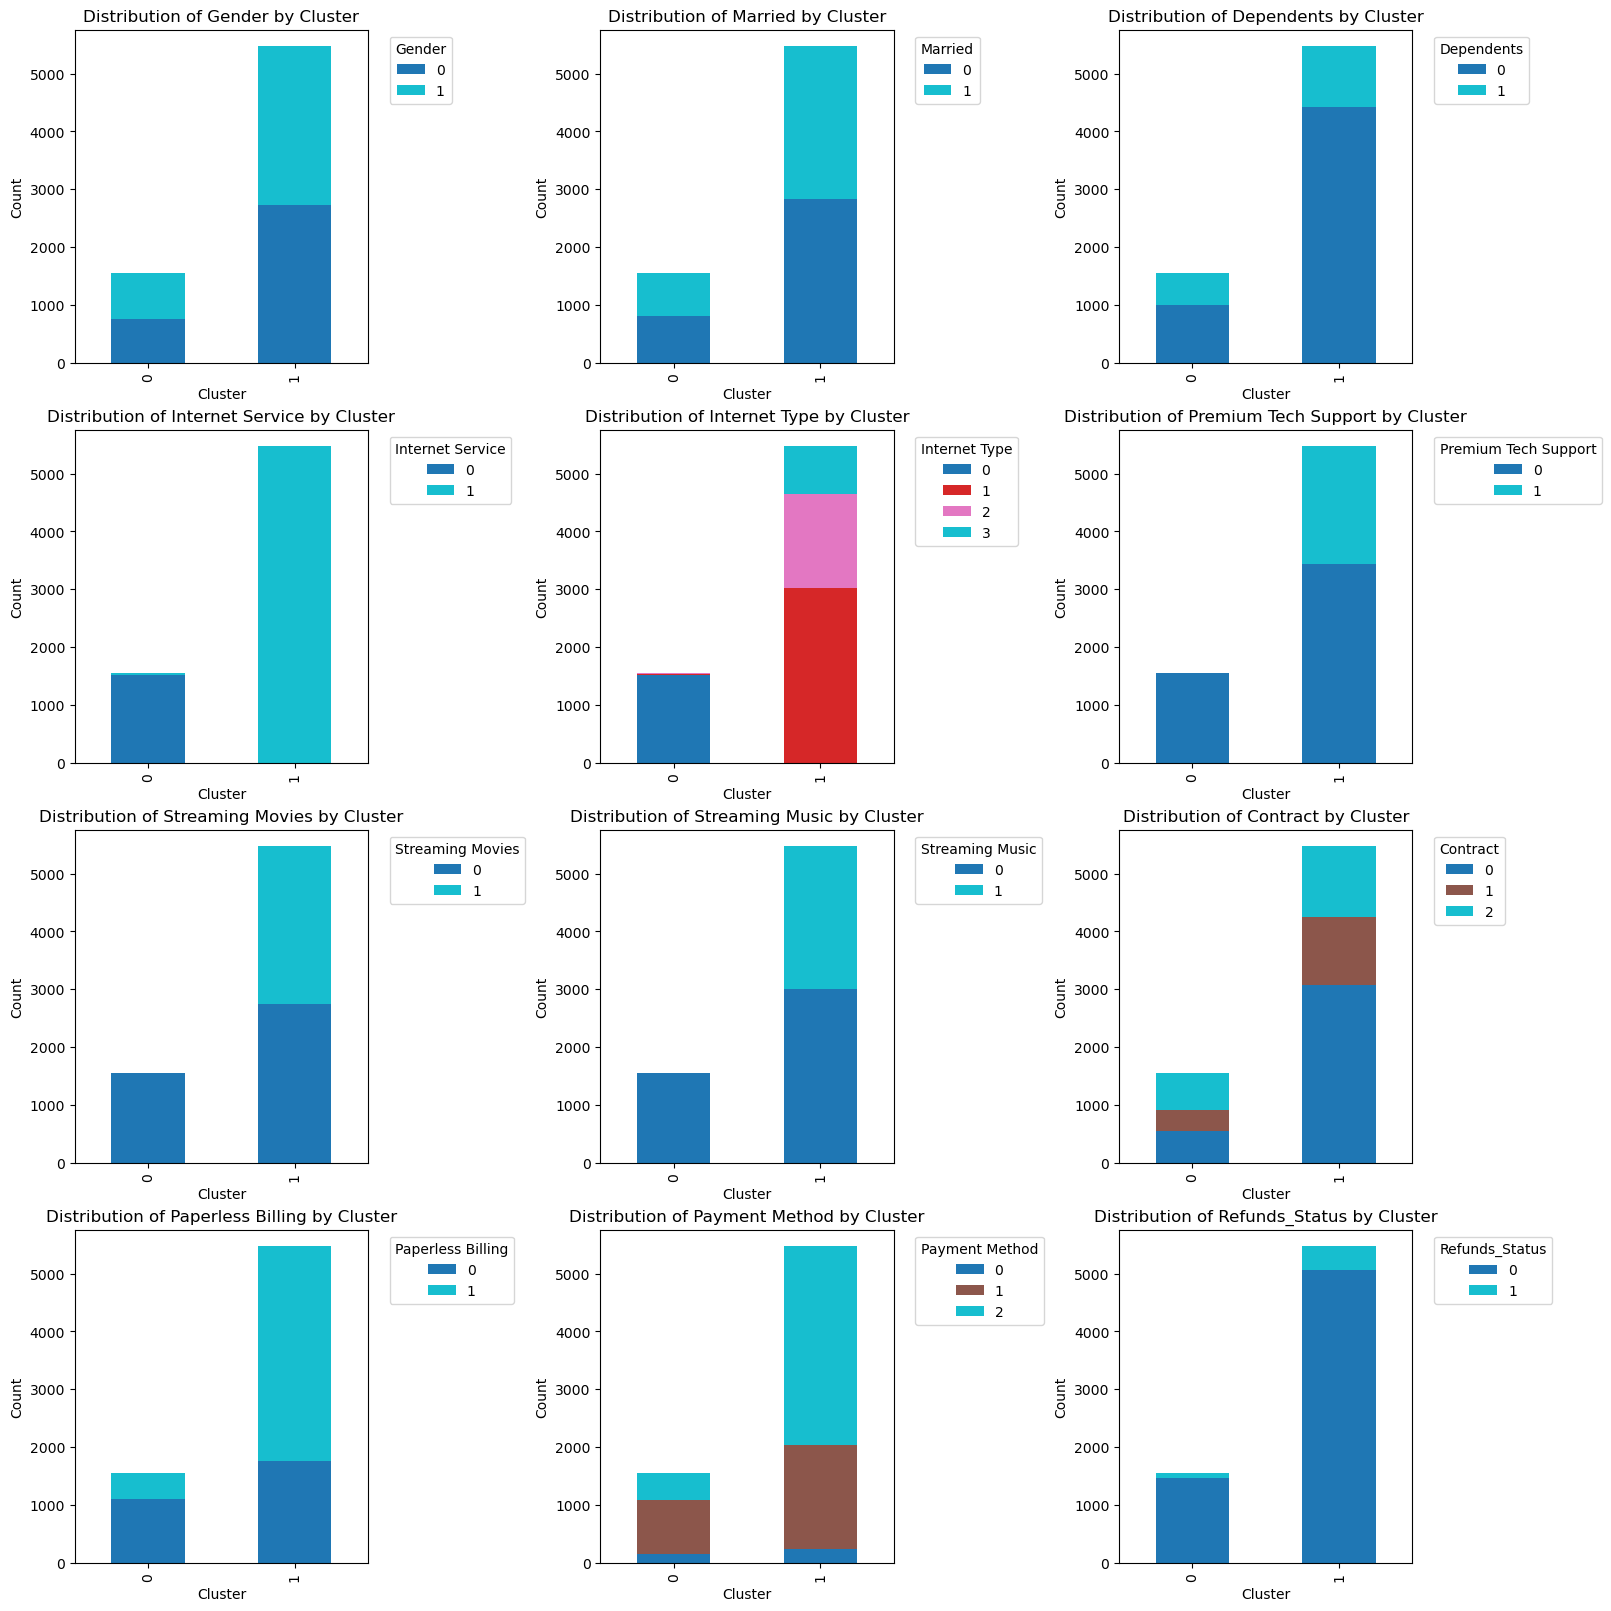

In [ ]:
n_cols = 3 
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows), constrained_layout=True)

axes = axes.flatten()

for i, cat_col in enumerate(categorical_columns):

    cat_cluster_counts = df_kmeans.groupby(['cluster', cat_col]).size().unstack(fill_value=0)
    

    cat_cluster_counts.plot(kind='bar', stacked=True, ax=axes[i], colormap='tab10')
    axes[i].set_title(f'Distribution of {cat_col} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Count')
    axes[i].legend(title=cat_col, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Summary

Key insight:
- Cluster 1 represent high value customer (loyal) by having more monthly charge, service usage subsribtion, high service usage, diverse on internet type and contract.
- Cluster 0 represent basic customer (higher change of churn) that will reduce the retention with almost every aspect are low. 


## Service Usage Analysis:
Our analysis reveals a contrast between our customer segments. Cluster 0 represents customers who haven't adopted our internet services, while Cluster 1 shows strong engagement with our digital offerings, including streaming services and technical support. What's particularly interesting is that Cluster 0 shows zero data usage, representing a significant untapped opportunity. Need to be remind that in cluster 0 has a higher satisfaction score(even though its broader than cluster 1) BUT with cluster 0 customer not using the internet services. This prove that there can be major improvement for cluster 0 customers.

Action Plan for Service Usage:
1. Digital Adoption Program
    - Offer first 3 months at a discounted rate with free installation
    - Include basic streaming service trial subscriptions

2. Digital Upgrade Path
    - Design tiered internet packages that grow with customer needs
    - Create bundle deals combining internet with existing services
    - Implement a "Try Before You Buy" program for streaming services

## Financial Analysis:
Looking at customer longevity, we're seeing stronger retention in Cluster 1, with customers staying with us longer. Both clusters maintain similar long-distance usage patterns, suggesting this remains a core service across segments. However, the monthly charge patterns tell an interesting story - Cluster 0 customers have minimal recurring charges, while Cluster 1 represents our primary revenue stream.

Action Plan for Financial Engagement:
1. Value-Based Pricing Strategy
    - Create family plans with multi-service discounts
    - Implement loyalty rewards program with tangible benefits

2. Revenue Growth Initiative
    - Create seasonal promotions aligned with usage patterns
    - Develop premium add-on services for Cluster 1

## Customer Behavior and Satisfaction Analysis:
The referral program shows room for improvement across both clusters, though there's potential for growth. The satisfaction scores tell an intriguing story, cluster 0 shows higher satisfaction peaks but more variability, while Cluster 1 maintains more consistent, though lower, satisfaction levels. This suggests different expectations and needs between the segments.

Action Plan for Customer Experience:
1. Referral Program Revamp
    - Implement referral challenges with special prizes
    - Develop social media sharing incentives

2. Satisfaction Enhancement Program
    - Establish regular customer feedback sessions
    - Create a VIP support line for high-value customers
    - Launch a customer appreciation program

3. Personalized Engagement Strategy
    - Create customized service recommendations
    - Launch a customer loyalty recognition program